In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies=pd.read_csv("C:\\Users\\Admin\\Desktop\\Data\\Assignments New\\Association Rules\\my_movies.csv",sep=",")
movies.head()


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df=pd.get_dummies(movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [4]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000,...,0.100000,0.100000,0.100000,0.600000,0.100000,0.100000,0.100000,0.400000,0.200000,0.100000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637,...,0.316228,0.316228,0.316228,0.516398,0.316228,0.316228,0.316228,0.516398,0.421637,0.316228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Apriori Algorithm

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(Patriot, V1_Gladiator)"


In [6]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [7]:
len(rules)

52

In [8]:

rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
5,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
6,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
7,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
8,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,"(Patriot, V1_Gladiator)",(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


In [10]:
#An leverage of 0 indicates independence.Range will be [-1,1]
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
43,"(Patriot, V2_Patriot)","(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
24,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
45,"(V1_Gladiator, V2_Patriot)","(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
30,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


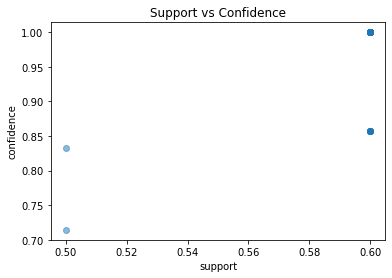

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

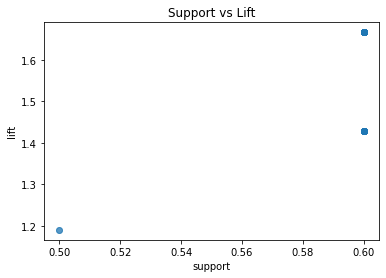

In [14]:

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()